In [2]:
'''
A1 Please refer to the “Purchase Data” worksheet of Lab Session Data.xlsx. Please load the data
and segregate them into 2 matrices A & C (following the nomenclature of AX = C). Do the following
activities.

A2. Use the Pseudo-inverse to calculate the model vector X for predicting the cost of the products
available with the vendor.

A3. Mark all customers (in “Purchase Data” table) with payments above Rs. 200 as RICH and others
as POOR. Develop a classifier model to categorize customers into RICH or POOR class based on
purchase behavior.
'''

import pandas as pd
import numpy as np
df = pd.read_csv('purchase.csv')

print(df.to_string()) 
A = df[['Candies (#)','Mangoes (Kg)','Milk Packets (#)']]
dim=df.to_numpy().shape
print("dimentionality of dataset is:",dim)
print("number of vectors is :",dim[0])
matA = A.values
C= df['Payment (Rs)']
matC=C.values
print("Matrix A:\n", matA)
rank = np.linalg.matrix_rank(matA)
print("rank of matrix A is ", rank)
print("Matrix C:\n", matC)
invA=np.linalg.pinv(matA)
print("Inverse of A:\n", invA)
res = np.dot(invA,matC)
print("Matrix X:\n",res)

df['RICH/POOR'] = df['Payment (Rs)'].apply(lambda x: 'RICH' if x > 200 else 'POOR')
print(df.to_string())

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
0      C_1           20             6                 2           386
1      C_2           16             3                 6           289
2      C_3           27             6                 2           393
3      C_4           19             1                 2           110
4      C_5           24             4                 2           280
5      C_6           22             1                 5           167
6      C_7           15             4                 2           271
7      C_8           18             4                 2           274
8      C_9           21             1                 4           148
9     C_10           16             2                 4           198
dimentionality of dataset is: (10, 5)
number of vectors is : 10
Matrix A:
 [[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
rank of matrix A is  3
Matrix C:
 

             Date Month  Day     Price      Open      High       Low   Volume  \
0    Jun 29, 2021   Jun  Tue  2,081.85  2,092.00  2,126.90  2,065.05    1.67M   
1    Jun 28, 2021   Jun  Mon  2,077.75  2,084.00  2,112.45  2,068.40  707.73K   
2    Jun 25, 2021   Jun  Fri  2,068.85  2,084.35  2,088.50  2,053.10  475.82K   
3    Jun 24, 2021   Jun  Thu  2,072.95  2,098.00  2,098.00  2,066.00  541.51K   
4    Jun 23, 2021   Jun  Wed  2,078.25  2,102.00  2,111.40  2,072.00  809.62K   
..            ...   ...  ...       ...       ...       ...       ...      ...   
244  Jul 07, 2020   Jul  Tue  1,397.40  1,410.00  1,411.00  1,390.05  480.21K   
245  Jul 06, 2020   Jul  Mon  1,400.75  1,405.50  1,415.50  1,394.00  614.93K   
246  Jul 03, 2020   Jul  Fri  1,405.10  1,415.00  1,425.00  1,398.00  599.49K   
247  Jul 02, 2020   Jul  Thu  1,412.35  1,440.00  1,467.80  1,395.30    2.16M   
248  Jul 01, 2020   Jul  Wed  1,363.05  1,363.65  1,377.00  1,356.00  383.00K   

       Chg%  
0     0.20%  

C:\Users\Shashank\AppData\Local\Temp\ipykernel_28876\1579139681.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wednesday_prices['Chg%'] = wednesday_prices['Chg%'].str.rstrip('%').astype(float)


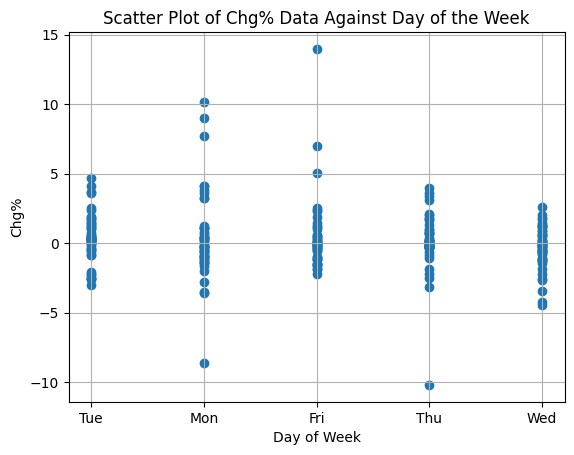

In [22]:
'''
A4. Please refer to the data present in “IRCTC Stock Price” data sheet of the above excel file. Do the
following after loading the data to your programming platform.
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

irctcDF = pd.read_csv('IRCTC.csv')
print(irctcDF)
irctcDF['Price'] = irctcDF['Price'].str.replace(',', '').astype(float)

mean_price = irctcDF['Price'].mean()
var_price = irctcDF['Price'].var()
print("Mean Price:", mean_price)
print("Variance Price:", var_price)

wednesday_prices = irctcDF[irctcDF['Day'] == 'Wed']
wednesday_mean = wednesday_prices['Price'].mean()
population_mean = irctcDF['Price'].mean()
print("Wednesday Prices:\n", wednesday_prices)
print("Sample Mean (Wednesdays):", wednesday_mean)
print("Population Mean:", population_mean)


irctcDF['Date'] = pd.to_datetime(irctcDF['Date'])
april_prices = irctcDF[irctcDF['Date'].dt.month == 4]
april_mean = april_prices['Price'].mean()

print("April Prices:\n", april_prices)
print("Sample Mean (April):", april_mean)
print("Population Mean:", population_mean)
irctcDF['Chg%'] = irctcDF['Chg%'].str.rstrip('%').astype(float)
loss_count = irctcDF['Chg%'].apply(lambda x: 1 if x<0 else 0).sum()
total_count = irctcDF['Chg%'].count()

prob_loss = loss_count/total_count
print(f'probability of loss {prob_loss:.4f}')

wednesday_prices['Chg%'] = wednesday_prices['Chg%'].str.rstrip('%').astype(float)
wed_profit_count = wednesday_prices['Chg%'].apply(lambda x: 1 if x>0 else 0).sum()

total_wed = wednesday_prices['Chg%'].count()
wed_profit = wed_profit_count / total_wed
print(f'probability of profit on wednesday {wed_profit:.4f}')
cond_prob_wed = wed_profit_count/total_wed
print(f'conditional probability of profit on wednesday {cond_prob_wed:.4f}')


# Scatter plot
# plt.figure(figsize=(10, 6))
plt.scatter(irctcDF['Day'], irctcDF['Chg%'])
# plt.xticks(list(day_to_num.values()), list(day_to_num.keys()))
plt.xlabel('Day of Week')
plt.ylabel('Chg%')
plt.title('Scatter Plot of Chg% Data Against Day of the Week')
plt.grid(True)
plt.show()

ecord you provided:

*   **Record ID**: 840801013
*   **age**: 29 (Numeric)
*   **sex**: F (Categorical - Nominal)
*   **on thyroxine**: f (Categorical - Nominal)
*   **query on thyroxine**: f (Categorical - Nominal)
*   **on antithyroid medication**: f (Categorical - Nominal)
*   **sick**: f (Categorical - Nominal)
*   **pregnant**: f (Categorical - Nominal)
*   **thyroid surgery**: f (Categorical - Nominal)
*   **I131 treatment**: f (Categorical - Nominal)
*   **query hypothyroid**: t (Categorical - Nominal)
*   **query hyperthyroid**: f (Categorical - Nominal)
*   **lithium**: f (Categorical - Nominal)
*   **goitre**: f (Categorical - Nominal)
*   **tumor**: f (Categorical - Nominal)
*   **hypopituitary**: f (Categorical - Nominal)
*   **psych**: f (Categorical - Nominal)
*   **TSH measured**: t (Categorical - Nominal)
*   **TSH**: 0.3 (Numeric)
*   **T3 measured**: f (Categorical - Nominal)
*   **T3**: ? (Numeric)
*   **TT4 measured**: f (Categorical - Nominal)
*   **TT4**: ? (Numeric)
*   **T4U measured**: f (Categorical - Nominal)
*   **T4U**: ? (Numeric)
*   **FTI measured**: f (Categorical - Nominal)
*   **FTI**: ? (Numeric)
*   **TBG measured**: f (Categorical - Nominal)
*   **TBG**: ? (Numeric)
*   **referral source**: other (Categorical - Nominal)
*  t or tool for performing these tasks, feel free to ask!DITION (Categorical - Nominal)

In [5]:
'''
A5. Data Exploration: Load the data available in “thyroid0387_UCI” worksheet. Perform the
following tasks:
'''

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import zscore

df = pd.read_csv('thyroid0387_UCI.csv')

print("Original DataFrame:")
print(df)
categorical_cols = ['sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication',
                    'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid',
                    'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych',
                    'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured',
                    'TBG measured', 'referral source', 'Condition']
numeric_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

label_encoder = LabelEncoder()

for col in categorical_cols:
    
    if df[col].dtype == 'object':
        df[col].replace('?', np.nan, inplace=True)
        df[col] = df[col].astype(str)  
    if df[col].isnull().sum() > 0:
        imputer = SimpleImputer(strategy='most_frequent')
        df[[col]] = imputer.fit_transform(df[[col]])  
        df[col] = label_encoder.fit_transform(df[col])
    else:
        df[col] = label_encoder.fit_transform(df[col])

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce') 
print("DataFrame after handling missing values and converting to numeric:")
print(df)
print("Data range for numeric variables:")
for col in numeric_cols:
    print(f"{col}: Min = {df[col].min()}, Max = {df[col].max()}")

print("Presence of missing values in each attribute:")
print(df.isnull().sum())

print("Presence of outliers in numeric variables (using z-score method):")
for col in numeric_cols:
    if df[col].dtype in ['int64', 'float64']:  
        z_scores = np.abs(zscore(df[col].dropna()))
        outliers = np.where(z_scores > 3)[0]
        if len(outliers) > 0:
            print(f"{col}: {len(outliers)} outliers found")
        else:
            print(f"{col}: No outliers found")
    else:
        print(f"{col}: Not numeric type, skipping z-score calculation")

print()

# Calculate mean and variance for numeric variables
print("Mean and variance (or standard deviation) for numeric variables:")
for col in numeric_cols:
    if df[col].dtype in ['int64', 'float64']:  
        mean = df[col].mean()
        
        variance = df[col].var()
        print(f"{col}: Mean = {mean}, Variance = {variance}")
    else:
        print(f"{col}: Not numeric type, skipping mean and variance calculation")


Original DataFrame:
      Record ID  age sex on thyroxine query on thyroxine  \
0     840801013   29   F            f                  f   
1     840801014   29   F            f                  f   
2     840801042   41   F            f                  f   
3     840803046   36   F            f                  f   
4     840803047   32   F            f                  f   
...         ...  ...  ..          ...                ...   
9167  870119022   56   M            f                  f   
9168  870119023   22   M            f                  f   
9169  870119025   69   M            f                  f   
9170  870119027   47   F            f                  f   
9171  870119035   31   M            f                  f   

     on antithyroid medication sick pregnant thyroid surgery I131 treatment  \
0                            f    f        f               f              f   
1                            f    f        f               f              f   
2                     

C:\Users\Shashank\AppData\Local\Temp\ipykernel_36448\1511322524.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace('?', np.nan, inplace=True)
C:\Users\Shashank\AppData\Local\Temp\ipykernel_36448\1511322524.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [7]:
'''
A6. Data Imputation: employ appropriate central tendencies to fill the missing values in the data
variables. Employ following guidance.
'''

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  

# Impute missing numeric values using mean or median based on presence of outliers
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        if np.abs(zscore(df[col].dropna())).max() > 3: 
            median_value = df[col].median()
            df[col].fillna(median_value, inplace=True)
        else:
            mean_value = df[col].mean()
            df[col].fillna(mean_value, inplace=True)

print("DataFrame after handling missing numeric values:")
print(df)

DataFrame after handling missing numeric values:
      Record ID  age  sex  on thyroxine  query on thyroxine  \
0     840801013   29    0             0                   0   
1     840801014   29    0             0                   0   
2     840801042   41    0             0                   0   
3     840803046   36    0             0                   0   
4     840803047   32    0             0                   0   
...         ...  ...  ...           ...                 ...   
9167  870119022   56    1             0                   0   
9168  870119023   22    1             0                   0   
9169  870119025   69    1             0                   0   
9170  870119027   47    0             0                   0   
9171  870119035   31    1             0                   0   

      on antithyroid medication  sick  pregnant  thyroid surgery  \
0                             0     0         0                0   
1                             0     0         0           

In [13]:
'''
A7. Data Normalization / Scaling: from the data study, identify the attributes which may need
normalization. Employ appropriate normalization techniques to create normalized set of data.
'''
from sklearn.preprocessing import MinMaxScaler
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce') 
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Normalized DataFrame:")
print(df)


Normalized DataFrame:
      Record ID       age  sex  on thyroxine  query on thyroxine  \
0     840801013  0.000427    0             0                   0   
1     840801014  0.000427    0             0                   0   
2     840801042  0.000610    0             0                   0   
3     840803046  0.000534    0             0                   0   
4     840803047  0.000473    0             0                   0   
...         ...       ...  ...           ...                 ...   
9167  870119022  0.000839    1             0                   0   
9168  870119023  0.000320    1             0                   0   
9169  870119025  0.001038    1             0                   0   
9170  870119027  0.000702    0             0                   0   
9171  870119035  0.000458    1             0                   0   

      on antithyroid medication  sick  pregnant  thyroid surgery  \
0                             0     0         0                0   
1                        

In [20]:
'''
Similarity Measure: Take the first 2 observation vectors from the dataset. Consider only the
attributes (direct or derived) with binary values for these vectors (ignore other attributes). Calculate
the Jaccard Coefficient (JC) and Simple Matching Coefficient (SMC) between the document vectors.
Use first vector for each document for this. Compare the values for JC and SMC and judge the
appropriateness of each of them.
'''

from sklearn.metrics import jaccard_score

binary_attributes = ['on thyroxine', 'query on thyroxine', 'on antithyroid medication',
                     'sick', 'pregnant', 'thyroid surgery', 'I131 treatment',
                     'query hypothyroid', 'query hyperthyroid', 'lithium',
                     'goitre', 'tumor', 'hypopituitary', 'psych',
                     'TSH measured', 'T3 measured', 'TT4 measured',
                     'T4U measured', 'FTI measured', 'TBG measured']
vector1 = df.loc[0, binary_attributes].values
vector2 = df.loc[1, binary_attributes].values

jc = jaccard_score(vector1, vector2)
smc = sum(vector1 == vector2) / len(vector1)

print(f"Jaccard Coefficient (JC): {jc}")
print(f"Simple Matching Coefficient (SMC): {smc}")

Jaccard Coefficient (JC): 0.25
Simple Matching Coefficient (SMC): 0.85


In [19]:
'''
Cosine Similarity Measure: Now take the complete vectors for these two observations (including
all the attributes). Calculate the Cosine similarity between the documents by using the second
feature vector for each document.
'''
from sklearn.metrics.pairwise import cosine_similarity

vector1 = df.loc[0, df.columns != 'Record ID'].values.reshape(1, -1)
vector2 = df.loc[1, df.columns != 'Record ID'].values.reshape(1, -1)
cosine_sim = cosine_similarity(vector1, vector2)
print(f"Cosine Similarity between the two documents: {cosine_sim[0][0]}")

Cosine Similarity between the two documents: 0.9977009625064739


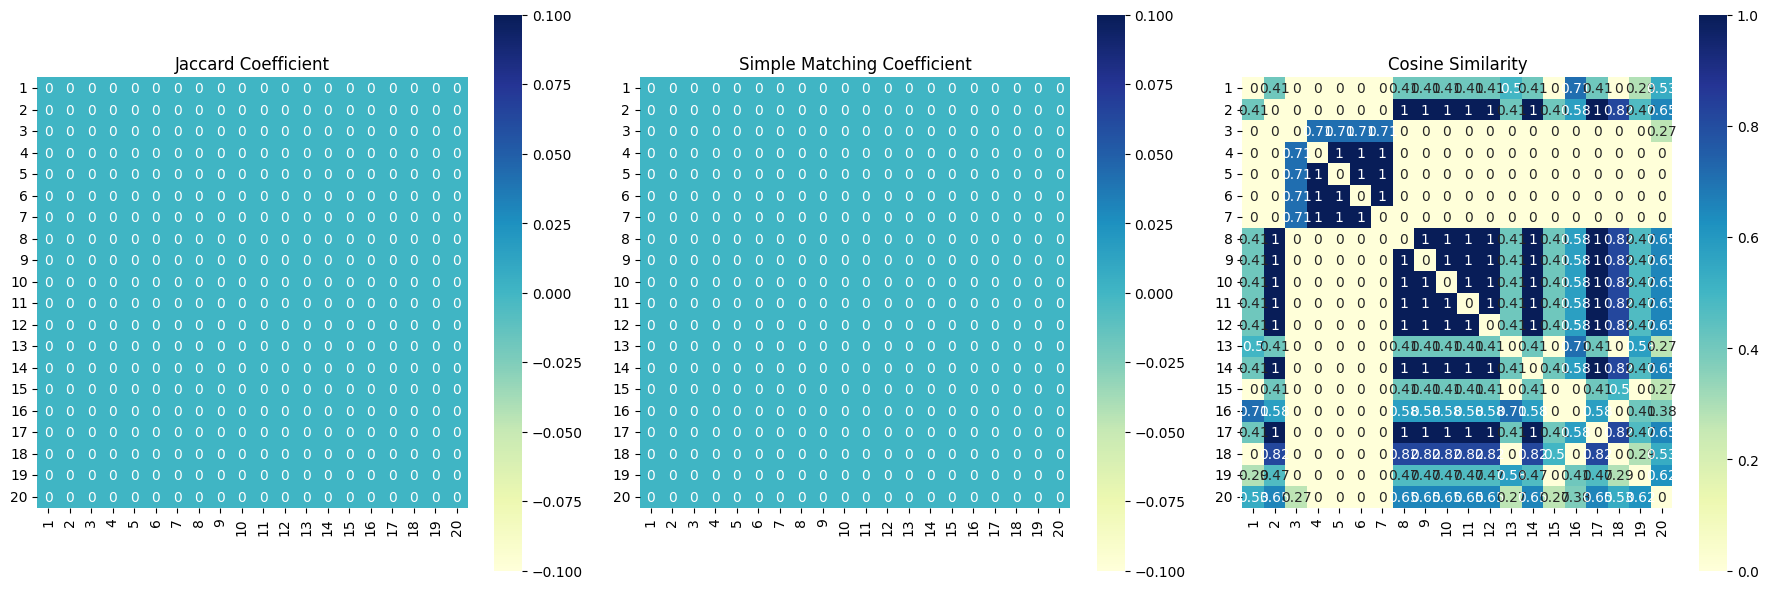

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import jaccard_score, pairwise_distances
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

attributes = ['on thyroxine', 'query on thyroxine', 'on antithyroid medication',
              'sick', 'pregnant', 'thyroid surgery', 'I131 treatment',
              'query hypothyroid', 'query hyperthyroid', 'lithium',
              'goitre', 'tumor', 'hypopituitary', 'psych',
              'TSH measured', 'T3 measured', 'TT4 measured',
              'T4U measured', 'FTI measured', 'TBG measured']


label_encoders = {}
for col in attributes:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


vectors = df.iloc[:20, :][attributes].values

jc_matrix = np.zeros((20, 20))
smc_matrix = np.zeros((20, 20))
cosine_matrix = np.zeros((20, 20))

for i in range(20):
    for j in range(20):
        if i != j:
            cosine_matrix[i, j] = 1 - pairwise_distances(vectors[i].reshape(1, -1), vectors[j].reshape(1, -1), metric='cosine')[0, 0]



fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(jc_matrix, ax=axes[0], annot=True, cmap="YlGnBu", cbar=True, square=True,
            xticklabels=list(range(1, 21)), yticklabels=list(range(1, 21)))
axes[0].set_title("Jaccard Coefficient")

sns.heatmap(smc_matrix, ax=axes[1], annot=True, cmap="YlGnBu", cbar=True, square=True,
            xticklabels=list(range(1, 21)), yticklabels=list(range(1, 21)))
axes[1].set_title("Simple Matching Coefficient")

sns.heatmap(cosine_matrix, ax=axes[2], annot=True, cmap="YlGnBu", cbar=True, square=True,
            xticklabels=list(range(1, 21)), yticklabels=list(range(1, 21)))
axes[2].set_title("Cosine Similarity")

plt.tight_layout()
plt.show()
